In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

city_data.head()
ride_data.head()

# Combine the data into a single dataset
merge_table = pd.merge(city_data, ride_data, on="city")

# Display the data table for preview
merge_table.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
city_table = merge_table.groupby(["type","city"])
city_table.sum().head()

driver_count    fare         ride_id
type  city                                                
Rural Bradshawfurt              70  400.64  37352940220451
      Garzaport                 21   72.37  17847448587502
      Harringtonfort            24  200.82  34358434657936
      Jessicaport                6  216.08  21736803740352
      Lake Jamie                24  206.15  21353310731781

In [4]:
# urb_loc = city_table.loc[(city_table["type"])=="Urban"]
# urb_drivers = urb_loc["driver_count"].sum
# urb_drivers

In [5]:
# u_test = urban.groupby(["city"])
# u_driver_Test = u_test["driver_count"].sum()
# u_driver_Test

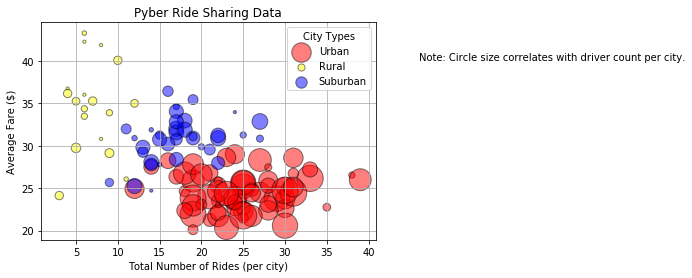

In [4]:
urban = merge_table.loc[(merge_table["type"])=="Urban"]
rural = merge_table.loc[(merge_table["type"])=="Rural"]
suburban = merge_table.loc[(merge_table["type"])=="Suburban"]

urban_cities = urban.groupby(["city"])
u_x = urban_cities["city"].count()
u_y = urban_cities["fare"].mean()
u_s = urban_cities["driver_count"].mean()

rural_cities = rural.groupby(["city"])
r_x = rural_cities["city"].count()
r_y = rural_cities["fare"].mean()
r_s = rural_cities["driver_count"].mean()

suburban_cities = suburban.groupby(["city"])
s_x = suburban_cities["city"].count()
s_y = suburban_cities["fare"].mean()
s_s = suburban_cities["driver_count"].mean()

u_plot = plt.scatter(u_x, u_y, marker="o", facecolors="red", edgecolors="black",s=u_s*10, alpha=0.5)
r_plot = plt.scatter(r_x, r_y, marker="o", facecolors="yellow", edgecolors="black",s=r_s*10, alpha=0.5)
s_plot = plt.scatter(s_x, s_y, marker="o", facecolors="blue", edgecolors="black",s=s_s*10, alpha=0.5)

# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

 # Add in a grid for the chart
plt.grid(which='major')

# Create a legend for the chart
plt.legend(('Urban', 'Rural', 'Suburban'),
          loc='best',
          title="City Types")

#add note regarding circle size
plt.figtext(1,0.75, s="Note: Circle size correlates with driver count per city.")

# Save the plot and display it
plt.savefig("Pyber Ride Sharing Data.png")
plt.show()

## Total Fares by City Type

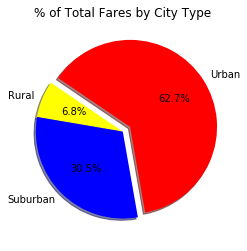

In [5]:
# Calculate Type Percents
urban_fares = urban["fare"].sum()
rural_fares = rural["fare"].sum()
suburban_fares = suburban["fare"].sum()

total_fares = merge_table["fare"].sum()

u_percent = urban_fares/total_fares * 100
r_percent = rural_fares/total_fares * 100
s_percent = suburban_fares/total_fares *100

# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [u_percent, r_percent, s_percent]

# The colors of each section of the pie chart
colors = ["red", "yellow", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Fares by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("% of Total Fares by City Type.png")
plt.show()


## Total Rides by City Type

In [6]:
city_group = merge_table.groupby(["city"])
drivers = city_group["driver_count"].sum()

# y = avg_fare["fare"].mean()
# d = drivers["driver_count"].count()


In [7]:
drivers

city
Amandaburgh              216
Barajasview              572
Barronchester            176
Bethanyland              396
Bradshawfurt              70
Brandonfort              190
Carriemouth             1404
Christopherfurt         1107
Colemanland              506
Davidfurt                391
Deanville                931
East Aaronbury            63
East Danielview          374
East Kaylahaven         1885
East Kentstad            260
East Marymouth           135
Erikaland                444
Garzaport                 21
Grahamburgh             1525
Grayville                 30
Harringtonfort            24
Huntermouth              888
Hurleymouth             1008
Jerryton                1600
Jessicaport                6
Johnton                  567
Joneschester             975
Josephside               675
Justinberg              1170
Karenberg                374
                        ... 
South Evanton            341
South Jack               874
South Jennifer            49
South Kar

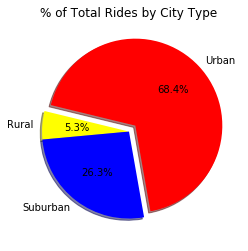

In [8]:
# Calculate Ride Percents
urban_rides = urban["ride_id"].count()
rural_rides = rural["ride_id"].count()
suburban_rides = suburban["ride_id"].count()

total_rides = merge_table["ride_id"].count()

u_ride_percent = urban_rides/total_rides * 100
r_ride_percent = rural_rides/total_rides * 100
s_ride_percent = suburban_rides/total_rides *100


# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
sizes = [u_ride_percent, r_ride_percent, s_ride_percent]

# The colors of each section of the pie chart
colors = ["red", "yellow", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Rides by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)

# Save Figure
plt.savefig("% of Total Rides by City Type.png")
plt.show()

## Total Drivers by City Type

C:\Users\Jon\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2802: RuntimeWarning: invalid value encountered in greater
  if sx > 1:


TypeError: only size-1 arrays can be converted to Python scalars

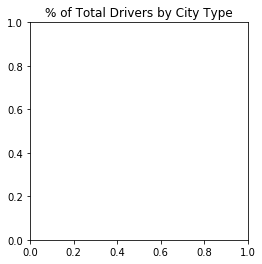

In [9]:
# Calculate Driver Percents


urb_drivers = urban_cities["driver_count"].sum()
rur_drivers = rural_cities["driver_count"].sum()
sub_drivers = suburban_cities["driver_count"].sum()


tot_drivers = city_group["driver_count"].sum()

urb_driver_perc = (urb_drivers/tot_drivers *100)
rur_driver_perc = (rur_drivers/tot_drivers *100)
sub_driver_perc = (sub_drivers/tot_drivers *100)

sizes = [urb_driver_perc, rur_driver_perc, sub_driver_perc]


# Build Pie Chart
labels = ["Urban", "Rural", "Suburban"]

# The values of each section of the pie chart
# sizes = [u_driver_percent, r_driver_percent, s_driver_percent]

# The colors of each section of the pie chart
colors = ["red", "yellow", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

plt.title("% of Total Drivers by City Type")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)


# Build Pie Charts

# Save Figure


In [ ]:
# Show Figure
plt.show()